In [2]:
import requests
from bs4 import BeautifulSoup

In [28]:
url = BeautifulSoup("https://www.nytimes.com/books/best-sellers/", 'html.parser')

/var/folders/3w/w7wtgd5140vdcrb3z0r5dq9r0000gn/T/ipykernel_8665/1272738403.py:1: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  url = BeautifulSoup("https://www.nytimes.com/books/best-sellers/", 'html.parser')


In [30]:
page = requests.get(url)
page

<Response [200]>

In [31]:
page.content

b'<!DOCTYPE html>\n<html lang="en"  xmlns:og="http://opengraphprotocol.org/schema/">\n  <head>\n    <meta charset="utf-8" />\n    <title data-rh="true">Best Sellers - Books</title>\n    <meta data-rh="true" name="description" content="The New York Times Best Sellers are up-to-date and authoritative lists of the most popular books in the United States, based on sales in the past week, including fiction, non-fiction, paperbacks, children\xe2\x80\x99s books, audiobooks, graphic books and more."/><meta data-rh="true" name="robots" content="noarchive"/><meta data-rh="true" property="twitter:title" content="Best Sellers - Books - The New York Times"/><meta data-rh="true" property="twitter:url" content="https://www.nytimes.com/books/best-sellers/"/><meta data-rh="true" property="twitter:description" content="The New York Times Best Sellers are up-to-date and authoritative lists of the most popular books in the United States, based on sales in the past week, including fiction, non-fiction, pap

In [32]:
soup = BeautifulSoup(page.content, "html.parser")
soup

<!DOCTYPE html>

<html lang="en" xmlns:og="http://opengraphprotocol.org/schema/">
<head>
<meta charset="utf-8"/>
<title data-rh="true">Best Sellers - Books</title>
<meta content="The New York Times Best Sellers are up-to-date and authoritative lists of the most popular books in the United States, based on sales in the past week, including fiction, non-fiction, paperbacks, children’s books, audiobooks, graphic books and more." data-rh="true" name="description"/><meta content="noarchive" data-rh="true" name="robots"/><meta content="Best Sellers - Books - The New York Times" data-rh="true" property="twitter:title"/><meta content="https://www.nytimes.com/books/best-sellers/" data-rh="true" property="twitter:url"/><meta content="The New York Times Best Sellers are up-to-date and authoritative lists of the most popular books in the United States, based on sales in the past week, including fiction, non-fiction, paperbacks, children’s books, audiobooks, graphic books and more." data-rh="true" 

[]

In [38]:
def scrape_nyt_bestsellers():
    try:
        url = "https://www.nytimes.com/books/best-sellers/"
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
        else:
            print("Failed to retrieve data from the website.")
            return None
    except Exception as e:
        print("Error occured during web scraping: ", str(e))
        return None


In [39]:
books = []
for book in soup.find_all('li', class_='css-1mr03gh'):
    title = book.find('h3', class_='css-i1z3c1').text.strip()
    author = book.find('p', class_='css-1nxjbfc').text.strip()
    books.append({'title': title, 'author': author})
books


[{'title': 'TOXIC PREY', 'author': 'by John Sandford'},
 {'title': 'THE WOMEN', 'author': 'by Kristin Hannah'},
 {'title': 'THE FAMILIAR', 'author': 'by Leigh Bardugo'},
 {'title': 'A COURT OF THORNS AND ROSES', 'author': 'by Sarah J. Maas'},
 {'title': 'A COURT OF MIST AND FURY', 'author': 'by Sarah J. Maas'},
 {'title': 'SOMEHOW', 'author': 'by Anne Lamott'},
 {'title': 'THE ANXIOUS GENERATION', 'author': 'by Jonathan Haidt'},
 {'title': 'THE WIDE WIDE SEA', 'author': 'by Hampton Sides'},
 {'title': "I'M GLAD MY MOM DIED", 'author': 'by Jennette McCurdy'},
 {'title': 'THE BODY KEEPS THE SCORE', 'author': 'by Bessel van der Kolk'},
 {'title': 'THE WOMEN', 'author': 'by Kristin Hannah'},
 {'title': 'THE FAMILIAR', 'author': 'by Leigh Bardugo'},
 {'title': 'FOURTH WING', 'author': 'by Rebecca Yarros'},
 {'title': 'TOXIC PREY', 'author': 'by John Sandford'},
 {'title': 'IRON FLAME', 'author': 'by Rebecca Yarros'},
 {'title': 'SOMEHOW', 'author': 'by Anne Lamott'},
 {'title': 'THE ANXIOUS

In [46]:
import mysql.connector
from mysql.connector import Error
def connect_to_mysql():
    try:
        connection = mysql.connector.connect(
           host = "localhost",
            user = "root",
        password = "",
        database = "book"
        )
        if connection.is_connected():
            print("Connected to MySQL database")
            return connection
    except Error as e:
        print("Error while connecting to MySQL", e)
connection = connect_to_mysql()       

Connected to MySQL database


In [50]:
def create_books_table(connection):
    try:
        cursor = connection.cursor()
        create_table_query = '''CREATE TABLE IF NOT EXISTS books (
        id INT AUTO_INCREMENT PRIMARY KEY,
        title VARCHAR(255) NOT NULL,
        author VARCHAR(255) NOT NULL
        )'''
        cursor.execute(create_table_query)
        print("Books table created successfully")
    except Error as e:
        print("Error creating books table:", e)
create_books_table(connection)

Books table created successfully


In [51]:
def insert_books_into_mysql(connection, books):
    try:
        cursor = connection.cursor()
        for book in books:
            title = book['title']
            author = book['author']
            insert_query = "INSERT INTO books (title, author) VALUES (%s, %s)"
            cursor.execute(insert_query, (title, author))
        connection.commit()
        print("Data inserted to mysql database successfully")
    except Error as e:
        print("Error inserting into mysql database:", e)
insert_books_into_mysql(connection, books)

Data inserted to mysql database successfully


In [72]:
import csv
books_data = 'books.csv'

def save_to_csv(connection, books_data):
    try:
        with open(books_data, 'w', newline='', encoding='utf-8') as csvfile:
            cursor = connection.cursor()
            cursor.execute("SELECT title, author FROM books")
            fieldnames = ['Title','Author']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            writer.writeheader()
            for row in cursor.fetchall():
                writer.writerow({'Title': row[0], 'Author': row[1]})
        print("Data saved to CSV file successfully")
    except Exception as e:
        print("Error occurred while saving data to csv file", str(e))
        
save_to_csv(connection, books_data)                

Data saved to CSV file successfully


In [73]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(books_data)
df 

Title  \
0                              TOXIC PREY   
1                               THE WOMEN   
2                            THE FAMILIAR   
3             A COURT OF THORNS AND ROSES   
4                A COURT OF MIST AND FURY   
5                                 SOMEHOW   
6                  THE ANXIOUS GENERATION   
7                       THE WIDE WIDE SEA   
8                    I'M GLAD MY MOM DIED   
9                THE BODY KEEPS THE SCORE   
10                              THE WOMEN   
11                           THE FAMILIAR   
12                            FOURTH WING   
13                             TOXIC PREY   
14                             IRON FLAME   
15                                SOMEHOW   
16                 THE ANXIOUS GENERATION   
17                   I'M GLAD MY MOM DIED   
18                      THE WIDE WIDE SEA   
19                     AGE OF REVOLUTIONS   
20            A COURT OF THORNS AND ROSES   
21                              WILD LOVE   
22               A COURT OF MIST AND FURY   
23                    JUST FOR THE SUMMER   
24              A COURT OF WINGS AND RUIN   
25               THE BODY KEEPS THE SCORE   
26             KILLERS OF THE FLOWER MOON   
27                            THINK AGAIN   
28                THINKING, FAST AND SLOW   
29                    BRAIDING SWEETGRASS   
30                          ATOMIC HABITS   
31                       THE CREATIVE ACT   
32              PLANTYOU: SCRAPPY COOKING   
33                     SUPERCOMMUNICATORS   
34                   MOSTLY WHAT GOD DOES   
35                                 WONDER   
36                                 HEROES   
37  THE COMPLETE COOKBOOK FOR YOUNG CHEFS   
38                   THE SUN AND THE STAR   
39                                  ODDER   
40                     DRAGONS LOVE TACOS   
41           WHAT DO YOU DO WITH AN IDEA?   
42       THE WONDERFUL THINGS YOU WILL BE   
43                      BLUEY: SLEEPYTIME   
44         ADDIE ANT GOES ON AN ADVENTURE   
45                        THRONE OF GLASS   
46          A GOOD GIRL'S GUIDE TO MURDER   
47                   DIARY OF A WIMPY KID   
48                           HARRY POTTER   
49               ONCE UPON A BROKEN HEART   
50                              POWERLESS   
51       THE REAPPEARANCE OF RACHEL PRICE   
52                          DIVINE RIVALS   
53                          RUTHLESS VOWS   
54                       HEARTLESS HUNTER   

                                               Author  
0                                    by John Sandford  
1                                   by Kristin Hannah  
2                                    by Leigh Bardugo  
3                                    by Sarah J. Maas  
4                                    by Sarah J. Maas  
5                                      by Anne Lamott  
6                                   by Jonathan Haidt  
7                                    by Hampton Sides  
8                                 by Jennette McCurdy  
9                              by Bessel van der Kolk  
10                                  by Kristin Hannah  
11                                   by Leigh Bardugo  
12                                  by Rebecca Yarros  
13                                   by John Sandford  
14                                  by Rebecca Yarros  
15                                     by Anne Lamott  
16                                  by Jonathan Haidt  
17                                by Jennette McCurdy  
18                                   by Hampton Sides  
19                                  by Fareed Zakaria  
20                                   by Sarah J. Maas  
21                                    by Elsie Silver  
22                                   by Sarah J. Maas  
23                                    by Abby Jimenez  
24                                   by Sarah J. Maas  
25                             by Bessel van der Kolk  
26 

In [74]:
author_counts = df['Author'].value_counts()
author_counts

Author
by Sarah J. Maas                                                      6
by John Sandford                                                      2
by Jennette McCurdy                                                   2
by Holly Jackson                                                      2
by Kristin Hannah                                                     2
by Rebecca Ross                                                       2
by Rebecca Yarros                                                     2
by Bessel van der Kolk                                                2
by Hampton Sides                                                      2
by Jonathan Haidt                                                     2
by Anne Lamott                                                        2
by Leigh Bardugo                                                      2
by Joe Brumm                                                          1
by Katherine Applegate. Illustrated by Charles Santoso   

/var/folders/3w/w7wtgd5140vdcrb3z0r5dq9r0000gn/T/ipykernel_8665/1192283731.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


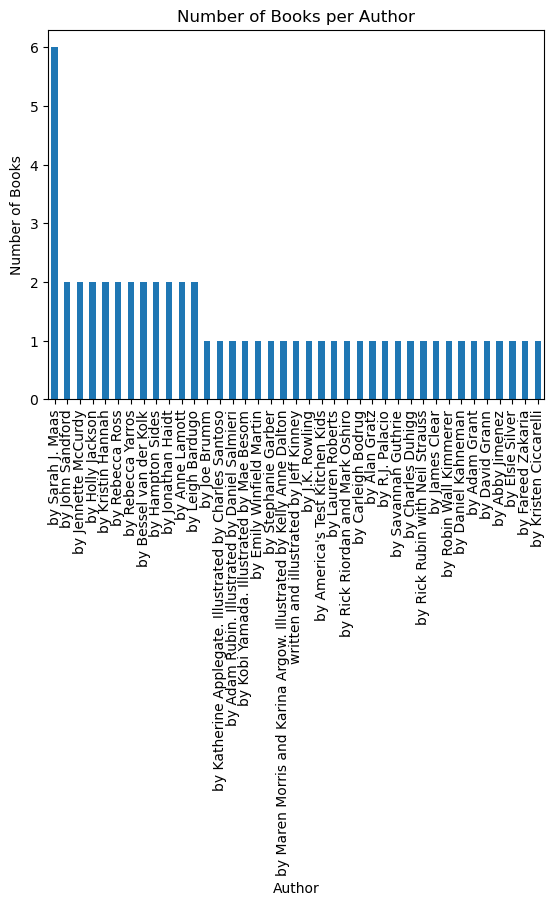

In [75]:
author_counts.plot(kind='bar')
plt.title('Number of Books per Author')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()